In [1]:
from language_helper.data import Processing
from language_helper.model import RNN

/Users/mynguyen/Repos/language-helper/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data
processor = Processing(data_domain="qa", delimiter="\t")
dataframe = processor.load()
processor.prepare(dataframe, "question")

print(f"Size of Vocab: {len(processor.vocabulary_mapping)}")
print(f"Size of Dataset: {len(processor.list_of_tokens)}")

[nltk_data] Downloading package punkt to /Users/mynguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading...<_io.TextIOWrapper name='./dataset/qa/S09_question_answer_pairs.txt' mode='r' encoding='UTF-8'>
825 rows and 6 columns appended
Loading...<_io.TextIOWrapper name='./dataset/qa/S08_question_answer_pairs.txt' mode='r' encoding='UTF-8'>
1715 rows and 6 columns appended
Completed: 2540 rows and 6 columns loaded
Columns Index(['ArticleTitle', 'Question', 'Answer', 'DifficultyFromQuestioner',
       'DifficultyFromAnswerer', 'ArticleFile'],
      dtype='object')
Size of Vocab: 3467
Size of Dataset: 1626


In [31]:
# start training
model = RNN(input_size = len(processor.vocabulary_mapping), 
            hidden_size=128,
            output_size=len(processor.vocabulary_mapping))

In [32]:
# trainer
from language_helper.train import Training
from language_helper.encode import EncodeUtility
from torch.nn import CrossEntropyLoss

trainer = Training(model=model, \
                    criterion=CrossEntropyLoss(), \
                    training_set=processor.list_of_tokens, \
                    encode = EncodeUtility(vocabulary_mapping= processor.vocabulary_mapping), \
                    n_iterations=1000, \
                    learning_rate=0.001)

In [33]:
trainer.run()

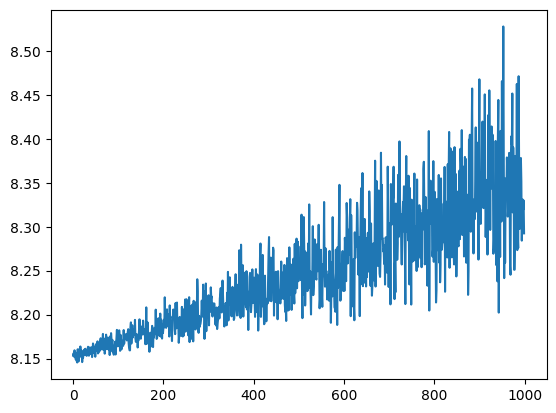

In [34]:
from matplotlib import pyplot as plt

plt.plot(trainer.training_result)
plt.show()

In [37]:
# Predict
from language_helper.predict import Predict
from language_helper.encode import EncodeUtility

input = "is"
Predict.predict(input_sentence=input, 
                rnn=model, 
                encode=EncodeUtility(vocabulary_mapping=processor.vocabulary_mapping), 
                hidden_size=128, 
                vocabulary_mapping=processor.vocabulary_mapping, output_length=3)

next input ['held']
next input ['phrase']
next input ['mallards']
next input ['grace']


[(['held'], tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003])),
 (['phrase'], tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003])),
 (['mallards'],
  tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003])),
 (['grace'], tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003]))]

In [13]:
# processor.vocabulary_mapping

encode = EncodeUtility(vocabulary_mapping=processor.vocabulary_mapping)

In [14]:
encode.find_word_index("fragmentary")

441

In [11]:
import nltk
nltk.word_tokenize("what")

['what']